In [34]:
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from os import listdir
#from keras.utils import img_to_array
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

from sklearn.model_selection import train_test_split
import numpy as np

# set random seed
np.random.seed(42)

# root folder
root_dir="C:\\Users\\user\\PycharmProjects\\pythonProject\\datasets\\new"

In [35]:
import numpy as np

# Assuming arr is your array of size 150528
arr = np.random.rand(150528)

# Reshape it to a shape that matches its size
new_shape = (224, 224, 3)  # Or any other shape that multiplies to 150528
reshaped_arr = arr.reshape(new_shape)


In [36]:
def convert_img_to_tensor(fpath):
    #read image
    img = cv2.imread(fpath)
    img = cv2.resize(img,(256,256))
    
    #converts image to array
    res = img_to_array(img)
    
    return res

def get_img_data_and_label(root_dir):
    dire=listdir(root_dir)
    
    image_dataset=[]
    image_label=[]
    classes=[]
    
    binary_label=[]
    i=0
    
    for subdir in dire:
        binary_label.append(i)
        classes.append(subdir)
        i+=1
        
    index=0
    
    for subdir in dire:
        skin_img_list=listdir(f"{root_dir}/{subdir}")
        
        for imgfile in skin_img_list:
            
            filepath=f"{root_dir}/{subdir}/{imgfile}"
            #convert image to array
            res=convert_img_to_tensor(filepath)
            #add data to dataset list
            image_dataset.append(res)
            image_label.append(binary_label[index])
            
        index+=1
        
    return image_dataset,image_label,len(binary_label),classes

In [4]:

image_dataset,image_labels,NoOfOutputLayer,classes = get_img_data_and_label(root_dir)

In [37]:
print(NoOfOutputLayer)
print(len(image_labels))
print(len(image_dataset))
print(image_dataset[0].shape)
print(classes)

3
1353
1353
(256, 256, 3)
['brown spot', 'healthy', 'leaf scald']


In [38]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(image_dataset,image_labels,test_size=0.2,random_state=100)
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)



xtrain = np.array(xtrain, dtype=np.float16)/ 255.0
xtrain = xtrain.reshape(-1,256,256,3)
xtest = np.array(xtest, dtype=np.float16)/ 255.0
xtest = xtest.reshape(-1,256,256,3)


print(xtrain.shape)
print(ytrain.shape)


(1082, 256, 256, 3)
(1082, 3)


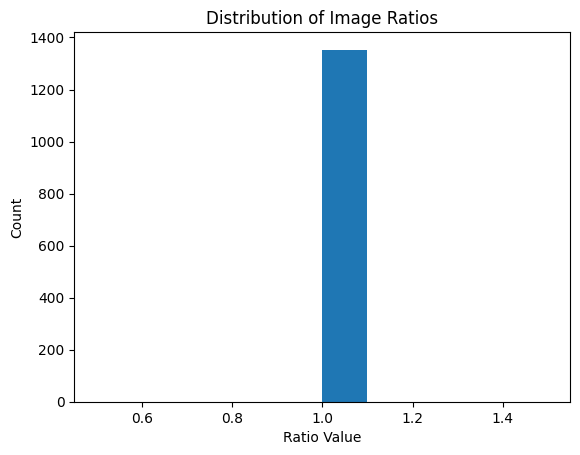

In [40]:
import matplotlib.pyplot as plt
RATIO_LIST = []
for set in (xtrain,xtest):
    for img in set:
        RATIO_LIST.append(img.shape[1]/img.shape[0])
        
plt.hist(RATIO_LIST)
plt.title('Distribution of Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()

In [42]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
y = dict()
y[0] = []
y[1] = []

for set_name in (ytrain,ytest):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))


Data=[]
for cls in classes:
    cls= go.Bar(
    x=['Train Set',  'Test Set'],
    y=y[0],
    name=cls,
    marker=dict(),
    opacity=0.7)
    Data.append(cls)

layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(Data, layout)
iplot(fig)

In [43]:
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(NoOfOutputLayer, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [44]:
print(len(xtrain),len(ytrain))
print(len(xtest),len(ytest))

1082 1082
271 271


In [45]:
model1=model.fit(xtrain,ytrain,epochs=15,validation_data=(xtest,ytest) , batch_size=32,verbose=1,shuffle=False)

Epoch 1/15
34/34 [==============================] - 33s 832ms/step - loss: 0.3941 - accuracy: 0.7782 - val_loss: 0.1896 - val_accuracy: 0.8708
Epoch 2/15
34/34 [==============================] - 26s 768ms/step - loss: 0.0694 - accuracy: 0.9750 - val_loss: 0.0313 - val_accuracy: 0.9889
Epoch 3/15
34/34 [==============================] - 27s 784ms/step - loss: 0.0168 - accuracy: 0.9908 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 4/15
34/34 [==============================] - 26s 752ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 5/15
34/34 [==============================] - 26s 773ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 6/15
34/34 [==============================] - 26s 754ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 7/15
34/34 [==============================] - 26s 753ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9889

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 123008)            0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Now the model expects (224, 224, 3) input


In [68]:
model.save("finalcnn.h5")


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Now the model expects (224, 224, 3) input


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Parameters
input_shape = (224, 224, 3)  # Assuming images are resized to 224x224
num_classes = 3  # Adjust based on the number of classes in your dataset

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [5]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and validation data
train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\user\\PycharmProjects\\pythonProject\\datasets\\new\\',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'C:\\Users\\user\\PycharmProjects\\pythonProject\\datasets\\NEW2\\',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1353 images belonging to 3 classes.
Found 1321 images belonging to 3 classes.


In [6]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# Save the model
model.save('finalcnn.h5')


Epoch 1/50
43/43 [==============================] - 58s 1s/step - loss: 1.0148 - accuracy: 0.5447 - val_loss: 1.2251 - val_accuracy: 0.3157
Epoch 2/50
43/43 [==============================] - 56s 1s/step - loss: 0.4677 - accuracy: 0.7598 - val_loss: 1.1843 - val_accuracy: 0.4217
Epoch 3/50
43/43 [==============================] - 55s 1s/step - loss: 0.4085 - accuracy: 0.7894 - val_loss: 0.8869 - val_accuracy: 0.5223
Epoch 4/50
43/43 [==============================] - 56s 1s/step - loss: 0.3717 - accuracy: 0.8101 - val_loss: 1.3556 - val_accuracy: 0.5708
Epoch 5/50
43/43 [==============================] - 58s 1s/step - loss: 0.3283 - accuracy: 0.8566 - val_loss: 1.4713 - val_accuracy: 0.5428
Epoch 6/50
43/43 [==============================] - 73s 2s/step - loss: 0.2239 - accuracy: 0.9106 - val_loss: 0.9403 - val_accuracy: 0.7184
Epoch 7/50
43/43 [==============================] - 55s 1s/step - loss: 0.1662 - accuracy: 0.9401 - val_loss: 1.5619 - val_accuracy: 0.6412
Epoch 8/50
43/43 [==

In [1]:
import tensorflow as tf
import numpy as np
import cv2

# Function to predict the class of an image
def predict_image(image_path, model):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be read. Check the file path and ensure the image exists.")
    
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Load the model
model = tf.keras.models.load_model('finalcnn.h5')

# Make predictions
try:
    predicted_class = predict_image('C:\\Users\\user\\PycharmProjects\\pythonProject\\datasets\\NEW2\\healthy\\healthy_val (55).jpg', model)
    print(f'Predicted Class: {predicted_class}')
except ValueError as e:
    print(e)


Predicted Class: 2


In [58]:
ypred=model.predict(xtest)

In [65]:
import numpy as np

# Assuming ytest is your one-hot encoded labels
ytest_categorical = np.argmax(ytest, axis=1)


AxisError: axis 1 is out of bounds for array of dimension 1

In [53]:
ypred=np.argmax(ypred,axis=1)
ypred

AxisError: axis 1 is out of bounds for array of dimension 1

In [18]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00        82

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

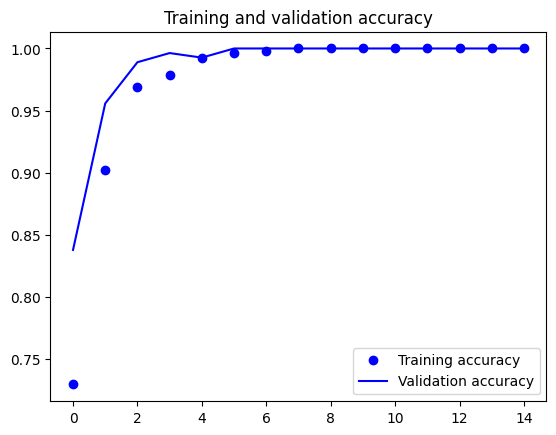

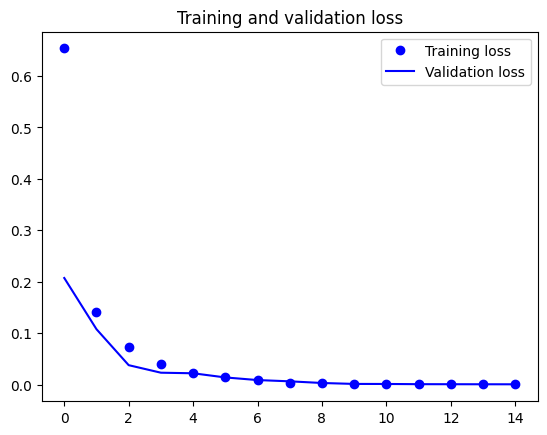

In [21]:
acc = model1.history['accuracy']
val_acc = model1.history['val_accuracy']
loss = model1.history['loss']
val_loss = model1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

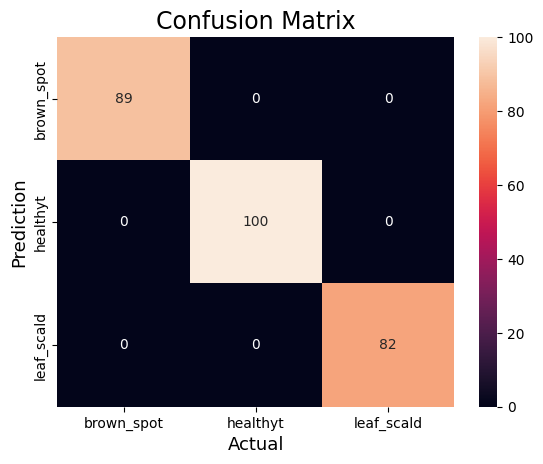

In [22]:
cm = confusion_matrix(ytest, ypred)
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['brown_spot','healthyt','leaf_scald'],
            yticklabels=['brown_spot','healthyt','leaf_scald'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()